<h1 align=center> Milk Grade classification </h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,LabelEncoder,label_binarize
from sklearn.metrics import roc_curve,auc
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.svm import LinearSVC,SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = pd.read_csv('./milknew.csv')
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [3]:
data.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [4]:
data.shape

(1059, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [6]:
le = LabelEncoder()

In [7]:
data['Grade'] = le.fit_transform(data['Grade'])

In [8]:
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,0
1,6.6,36,0,1,0,1,253,0
2,8.5,70,1,1,1,1,246,1
3,9.5,34,1,1,0,1,255,1
4,6.6,37,0,0,0,0,255,2


In [9]:
data.Grade.unique()

array([0, 1, 2])

In [10]:
data.dropna(inplace=True)

In [11]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [12]:
sc = StandardScaler()

In [13]:
x = sc.fit_transform(x)

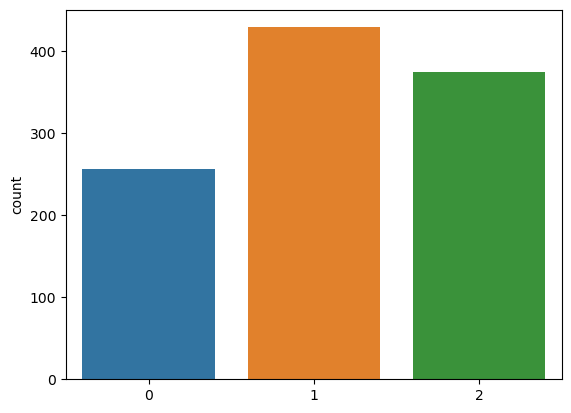

In [14]:
sns.countplot(x=y);

In [15]:
x,y = SMOTE().fit_resample(x,y)

In [16]:
models = {
    "LogisticRegression":LogisticRegression(random_state=42),
    "RandomForestClassifier":RandomForestClassifier(random_state=42),
    "DecisionTreeClassifier":DecisionTreeClassifier(random_state=42),
    "AdaBoostClassifier":AdaBoostClassifier(random_state=42),
    "GradientBoostingClassifier":GradientBoostingClassifier(random_state=42),
    "KNeighborsClassifier":KNeighborsClassifier(),
    "LinearSVC":LinearSVC(random_state=42)
}

In [17]:
for name,model in models.items():
    scores = cross_val_score(model,x,y,scoring='accuracy',n_jobs=-1,cv=10)
    print("Cross validation model:{}".format(name))
    print("Mean score :",np.mean(scores)*100)
    print("*"*100)

Cross validation model:LogisticRegression
Mean score : 86.6327519379845
****************************************************************************************************
Cross validation model:RandomForestClassifier
Mean score : 99.84496124031008
****************************************************************************************************
Cross validation model:DecisionTreeClassifier
Mean score : 99.6124031007752
****************************************************************************************************
Cross validation model:AdaBoostClassifier
Mean score : 90.76065891472868
****************************************************************************************************
Cross validation model:GradientBoostingClassifier
Mean score : 99.68992248062015
****************************************************************************************************
Cross validation model:KNeighborsClassifier
Mean score : 99.61119186046513
*****************************************

### RandomForestClassifier

In [18]:
y = label_binarize(y,classes=[0,1,2])
n_classes = 3

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

In [20]:
clf = OneVsRestClassifier(RandomForestClassifier(random_state=42))

In [21]:
y_score = clf.fit(x_train,y_train).predict_proba(x_test)

In [22]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i],tpr[i],_ = roc_curve(y_test[:,i],y_score[:,i])
    roc_auc[i] = auc(fpr[i],tpr[i])

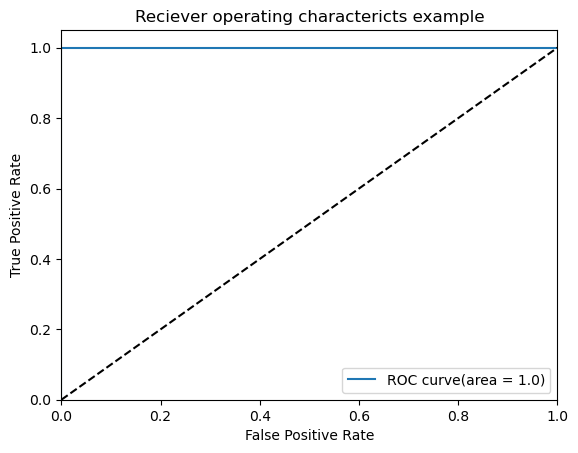

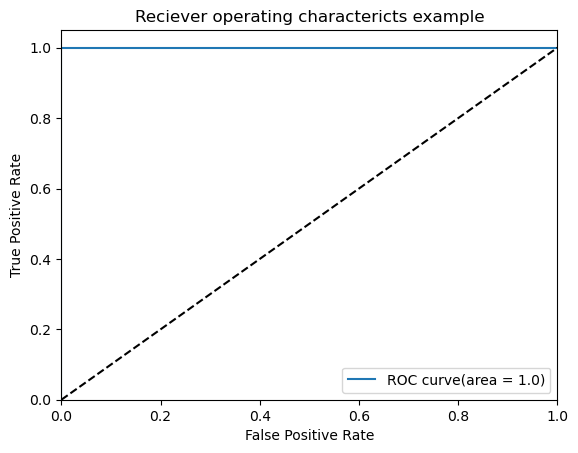

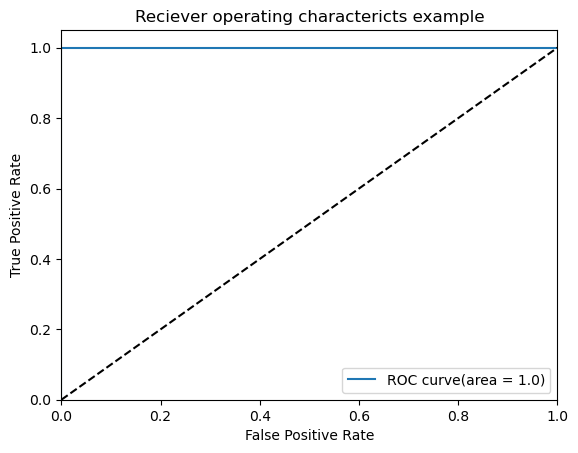

In [23]:
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i],tpr[i],label='ROC curve(area = {})'.format(roc_auc[i]))
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Reciever operating charactericts example")
    plt.legend(loc='lower right')
    plt.show()